In [27]:
import numpy as np
import matplotlib.pyplot as plt

data = {20.058: [0.0, 10, 2],
        13.394: [0.0, 15, 2],
        10.058: [0.003770034743466293, 20, 2],
        8.058: [0.021548380819324975, 25, 2],
        6.726: [0.07112883088145004, 30, 2],
        5.774: [0.19255232334301967, 35, 2],
        5.058: [0.35365118119170863, 40, 2],
        4.506: [0.9379180000930928, 45, 2],
        4.058: [2.0535895915650375, 50, 2],
        30.0636: [0.0, 10, 3],
        20.0676: [0.0, 15, 3],
        15.0636: [0.0, 20, 3],
        12.0636: [0.008810984949813583, 25, 3],
        10.0656: [0.030036149203557957, 30, 3],
        8.637599999999999: [0.1286586974722017, 35, 3],
        7.563599999999999: [0.2394908430502093, 40, 3],
        6.7356: [0.4641390218345241, 45, 3],
        6.0636: [1.0278055632403955, 50, 3],
        40.062: [0.0, 10, 4], 26.734: [0.0, 15, 4],
        20.061999999999998: [0.0, 20, 4], 16.062: [0.00014759374704526306, 25, 4],
        13.398: [0.00023513508779432235, 30, 4], 11.494: [0.0009179476192313885, 35, 4],
        10.062: [0.0022749391387241916, 40, 4], 8.958: [0.004547786041357022, 45, 4],
        8.062: [0.008762829422303834, 50, 4], 50.064: [0.0, 10, 5], 33.404: [0.0, 15, 5],
        25.063999999999997: [4.9084039237780966e-06, 20, 5], 20.064: [0.0002029466682324144, 25, 5],
        16.733999999999998: [0.00026350479989146634, 30, 5], 14.354: [0.0009746041389841095, 35, 5],
        12.564: [0.0017665326618803102, 40, 5], 11.184: [0.005426854387659443, 45, 5],
        10.064: [0.009364882163762772, 50, 5]}

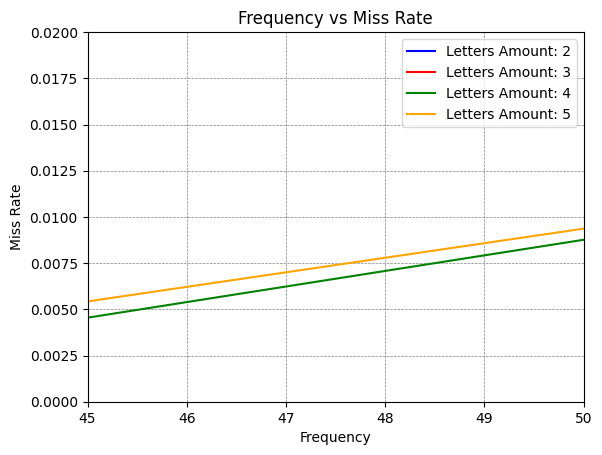

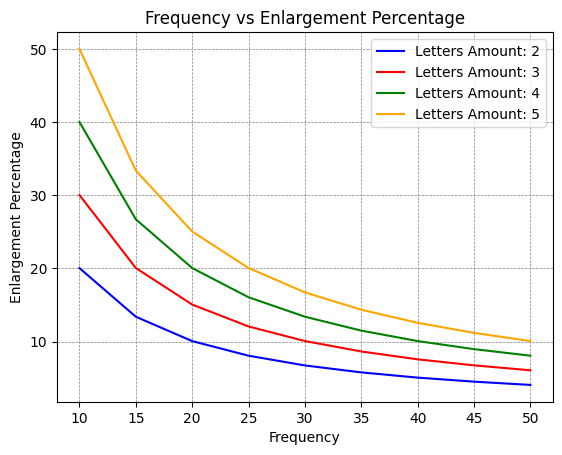

In [32]:

# Extract unique letters amount values
letters_amounts = list(set([v[2] for v in data.values()]))

colors = ['blue', 'red', 'green', 'orange']
color_idx = 0
# Loop over each letters amount and create separate graphs
for letters_amount in letters_amounts:
    # Extract data for the current letters amount
    frequency = []
    miss_rate = []
    enlargement_percentage = []
    for key, value in data.items():
        if value[2] == letters_amount:
            frequency.append(value[1])
            miss_rate.append(value[0])
            enlargement_percentage.append(key)

    # Create plot with Frequency on x-axis and Miss Rate on y-axis
    plt.plot(frequency, miss_rate, color=colors[color_idx], label=f'Letters Amount: {letters_amount}')
    color_idx += 1
plt.xlabel('Frequency')
plt.ylabel('Miss Rate')
plt.legend()
plt.title(f'Frequency vs Miss Rate')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlim(45, 50)
plt.ylim(0, 0.02)
plt.show()

color_idx = 0
for letters_amount in letters_amounts:
    # Extract data for the current letters amount
    frequency = []
    miss_rate = []
    enlargement_percentage = []
    for key, value in data.items():
        if value[2] == letters_amount:
            frequency.append(value[1])
            miss_rate.append(value[0])
            enlargement_percentage.append(key)

    # Create plot with Frequency on x-axis and Enlargement Percentage on y-axis

    plt.plot(frequency, enlargement_percentage, color=colors[color_idx], label=f'Letters Amount: {letters_amount}')
    color_idx += 1
plt.xlabel('Frequency')
plt.ylabel('Enlargement Percentage')
plt.legend()
plt.title(f'Frequency vs Enlargement Percentage')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()



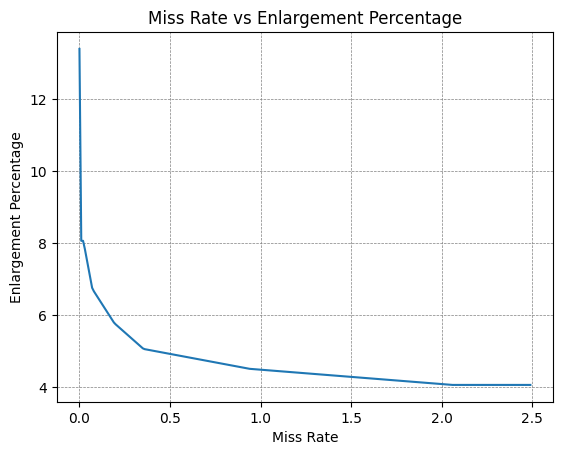

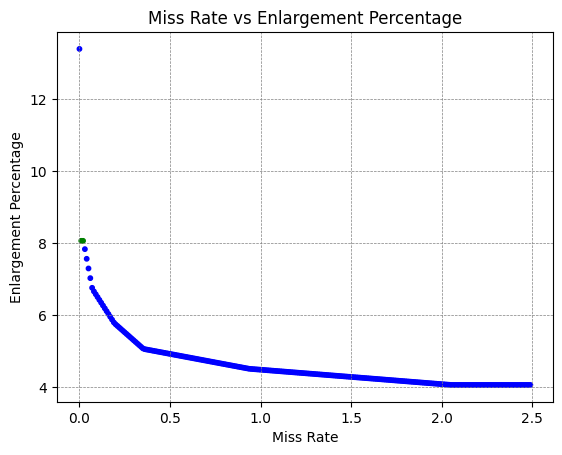

In [29]:
import numpy as np
import matplotlib.pyplot as plt

colors_dict = {2: 'blue', 3: 'red', 4: 'green', 5: 'yellow'}
color_idx = 0

new_data = {}

# Loop over each letters amount and create separate graphs
for letters_amount in letters_amounts:
    # Extract data for the current letters amount
    new_data[letters_amount] = [[], [], []]
    for key, value in data.items():
        if value[2] == letters_amount:
            new_data[letters_amount][0].append(value[1])
            new_data[letters_amount][1].append(value[0])
            new_data[letters_amount][2].append(key)

# d: {letters_amount: [list frequency,list  miss_rate,list enlargement_percentage],
#    letters_amount: [list frequency,list  miss_rate,list enlargement_percentage],}


miss_rates = np.arange(0, 2.5, 0.01)
min_results = {}
for mr in miss_rates:
    min_enlargement = 101
    min_letter_amount = 0

    for letters_amount in letters_amounts:
        # Extract data for the current letters amount
        frequencies_list = new_data[letters_amount][0]
        miss_rates_list = new_data[letters_amount][1]
        enlargement_percentage_list = new_data[letters_amount][2]

        x_interp = mr
        freq_of_mr = np.interp(x_interp, miss_rates_list, frequencies_list)
        enlargement_of_freq = np.interp(freq_of_mr, frequencies_list, enlargement_percentage_list)

        if enlargement_of_freq < min_enlargement:
            min_enlargement = enlargement_of_freq
            min_letter_amount = letters_amount

    min_results[mr] = [min_enlargement, min_letter_amount]
    min_enlargement = 101
    min_letter_amount = 0

# Create plot with Frequency on x-axis and Miss Rate on y-axis


enlargement_percentages = np.array([v[0] for v in min_results.values()])
miss_rates_list = np.array([k for k in min_results.keys()])
plt.plot(miss_rates_list, enlargement_percentages)

plt.xlabel('Miss Rate')
plt.ylabel('Enlargement Percentage')
plt.title(f'Miss Rate vs Enlargement Percentage')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

enlargement_percentages = np.array([v[0] for v in min_results.values()])
miss_rates_list = np.array([k for k in min_results.keys()])
colors = np.array([colors_dict[v[1]] for v in min_results.values()])
plt.scatter(miss_rates_list, enlargement_percentages, color=colors, s=10)

plt.xlabel('Miss Rate')
plt.ylabel('Enlargement Percentage')
plt.title(f'Miss Rate vs Enlargement Percentage')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()





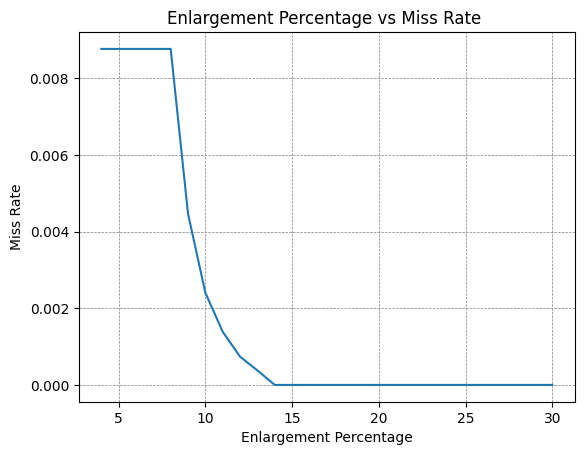

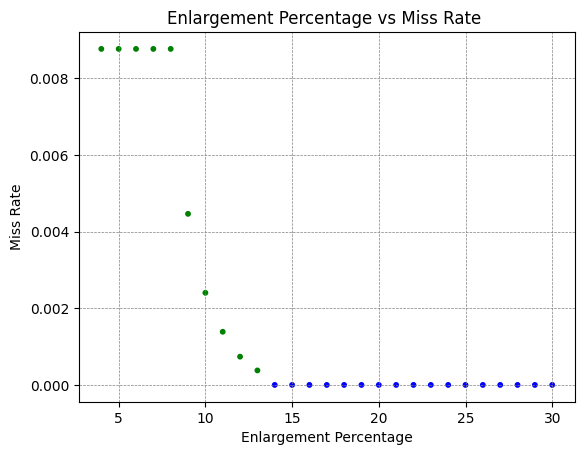

In [30]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['blue', 'red', 'green', 'yellow']
color_idx = 0

new_data = {}

# Loop over each letters amount and create separate graphs
for letters_amount in letters_amounts:
    # Extract data for the current letters amount
    new_data[letters_amount] = [[], [], []]
    for key, value in data.items():
        if value[2] == letters_amount:
            new_data[letters_amount][0].append(value[1])
            new_data[letters_amount][1].append(value[0])
            new_data[letters_amount][2].append(key)

# d: {letters_amount: [list frequency,list  miss_rate,list enlargement_percentage],
#    letters_amount: [list frequency,list  miss_rate,list enlargement_percentage],}


enlargement_percentages = np.arange(4, 31, 1)
min_results = {}
for ep in enlargement_percentages:
    min_mr = 101
    min_letter_amount = 0

    for letters_amount in letters_amounts:
        # Extract data for the current letters amount
        frequencies_list = new_data[letters_amount][0]
        miss_rates_list = new_data[letters_amount][1]
        enlargement_percentage_list = new_data[letters_amount][2]

        x_interp = ep
        freq_of_ep = np.interp(x_interp, enlargement_percentage_list[::-1], frequencies_list[::-1])
        mr_of_freq = np.interp(freq_of_ep, frequencies_list, miss_rates_list)

        if mr_of_freq < min_mr:
            min_mr = mr_of_freq
            min_letter_amount = letters_amount

    min_results[ep] = [min_mr, min_letter_amount]
    min_enlargement = 101
    min_letter_amount = 0

# Create plot with Frequency on x-axis and Miss Rate on y-axis

enlargement_percentages = np.array([k for k in min_results.keys()])
mr_by_enlargement_percentages = np.array([v[0] for v in min_results.values()])

plt.plot(enlargement_percentages, mr_by_enlargement_percentages)
plt.xlabel('Enlargement Percentage')
plt.ylabel('Miss Rate')
plt.title(f'Enlargement Percentage vs Miss Rate ')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

enlargement_percentages = np.array([k for k in min_results.keys()])
mr_by_enlargement_percentages = np.array([v[0] for v in min_results.values()])

colors = np.array([colors_dict[v[1]] for v in min_results.values()])
plt.scatter(enlargement_percentages, mr_by_enlargement_percentages, color=colors, s=10)
plt.xlabel('Enlargement Percentage')
plt.ylabel('Miss Rate')
plt.title(f'Enlargement Percentage vs Miss Rate ')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()


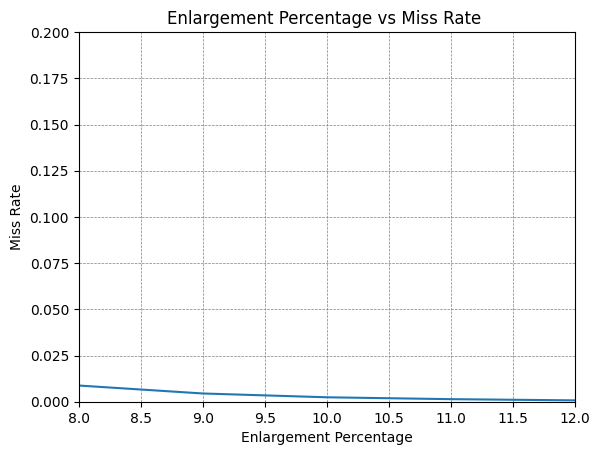

In [31]:
# zoom in

plt.plot(enlargement_percentages, mr_by_enlargement_percentages)
plt.xlabel('Enlargement Percentage')
plt.ylabel('Miss Rate')
plt.title(f'Enlargement Percentage vs Miss Rate ')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlim(8, 12)
plt.ylim(0, 0.2)
plt.show()
